
# Load HRET ssh and currents


In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature
import numpy as np
import xarray as xr
from utide._ut_constants import ut_constants as utide

from utils import *

# useful variables
j=np.complex(0,1)
cpd=2.*np.pi/86400. # from cpd to radian/s
crs = ccrs.PlateCarree() # cartopy

#datadir = '/home2/pharos/othr/aponte/tides/HRET/'
#datadir = './'

# tmp
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# load hret for one constituent
hret, constituents, omega = get_hret_ssh(constituents=['M2'], lonb=(30, 130), latb=(-40, 0), bathy=True)
print(hret)

M2 omega=1.405189e-04 rad/s, 1.932 cpd
<xarray.Dataset>
Dimensions:    (latitude: 800, longitude: 2001)
Coordinates:
  * longitude  (longitude) float64 30.0 30.05 30.1 30.15 30.2 30.25 30.3 ...
  * latitude   (latitude) float64 -40.0 -39.95 -39.9 -39.85 -39.8 -39.75 ...
Data variables:
    M2re       (latitude, longitude) float64 dask.array<shape=(800, 2001), chunksize=(480, 400)>
    M2im       (latitude, longitude) float64 dask.array<shape=(800, 2001), chunksize=(480, 400)>
    mask       (latitude, longitude) float64 dask.array<shape=(800, 2001), chunksize=(480, 400)>
    h          (latitude, longitude) float64 4.426e+03 4.466e+03 4.503e+03 ...
Attributes:
    history:                  merged txa/j1a/j2a, txb/j1b, g1a, and e2a/n1b/s...
    resolution:               The spatial basis function coefficients are def...
    creator:                  Ed Zaron, ezaron@pdx.edu
    post-processing scripts:  baburu:NASA-Tides/Julia/; this file was written...
    scripts:                  nam

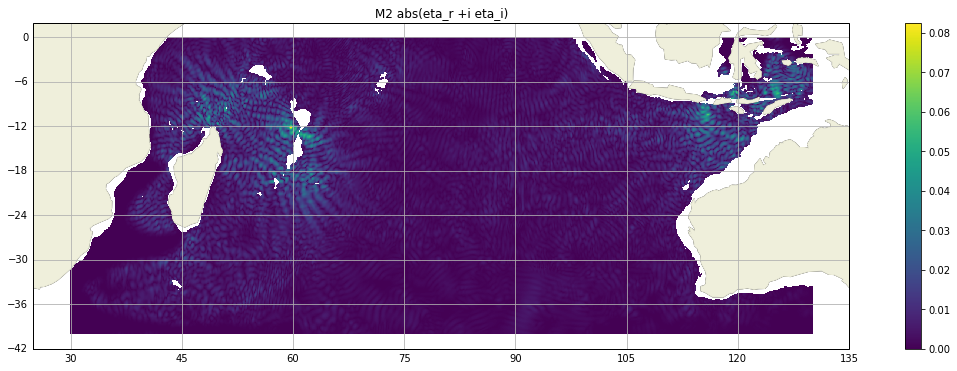

In [3]:
hc=1000.
cst = 'M2'

fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111, projection=crs)
#
toplt = np.abs(hret[cst+'re']+j*hret[cst+'im'])
toplt = toplt.where(hret['h']>hc)
toplt.plot()
ax.set_title(cst+' abs(eta_r +i eta_i)')
gl = ax.gridlines(crs=crs, draw_labels=True) 
gl.xlabels_top = False
gl.ylabels_right = False
ax.coastlines()
ax.add_feature(cartopy.feature.LAND)
plt.show()


---

In [5]:
U, V, constituents, omega = get_hret_uv(constituents=['M2','K1'], lonb=(30, 130), latb=(-40, 0), bathy=True)

K1 omega=7.292116e-05 rad/s, 1.003 cpd
M2 omega=1.405189e-04 rad/s, 1.932 cpd
7.292116514526208e-05


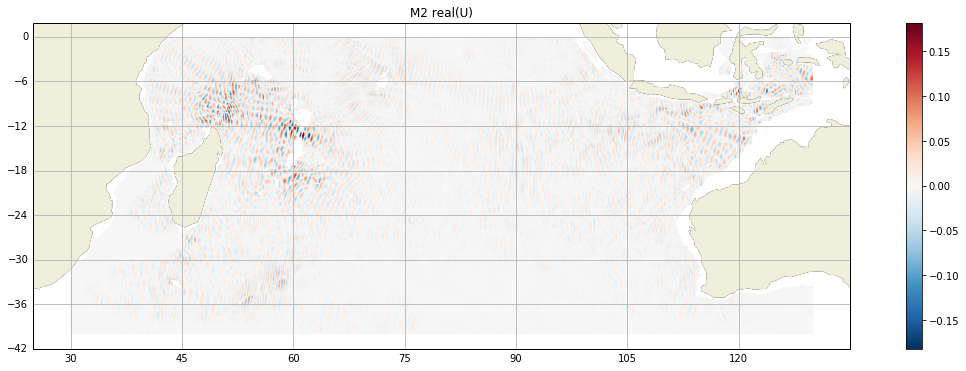

In [6]:
cst = 'M2'

fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111, projection=crs)
#
toplt = np.real(U['M2'])
toplt = toplt.where(hret['h']>hc)
toplt.plot()
ax.set_title(cst+' real(U)')
gl = ax.gridlines(crs=crs, draw_labels=True) 
gl.xlabels_top = False
gl.ylabels_right = False
ax.coastlines()
ax.add_feature(cartopy.feature.LAND)
plt.show()
